In [1]:
# encoding: utf-8
# Author: Zhuangwei Kang
%matplotlib inline
import matplotlib.pyplot as plt
from datapsr import *
from constants import *

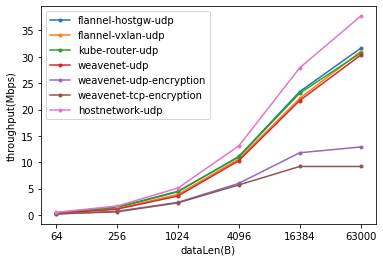

In [2]:
# dataLen test
data_len_test = range(6)
throughput_perf, latency_perf = load_data(data_len_test, plugins, latencyTest=True)

data_len = [64, 256, 1024, 4096, 16384, 63000]
x = np.arange(6)
total_width, n = 0.8, len(plugins)
width = total_width / n
# x = x - (total_width - width) / 2

plt.xticks(range(len(data_len)), data_len, rotation=0)
cell_text = []
# plt.ylim(0, 100)
for i, cni in enumerate(plugins):
    thr = throughput_perf[throughput_perf['cni'] == cni]['mbps(ave)']
    plt.plot(x, thr, label=cni, marker='.')
plt.legend()
plt.xlabel('dataLen(B)')
plt.ylabel('throughput(Mbps)')
plt.show()

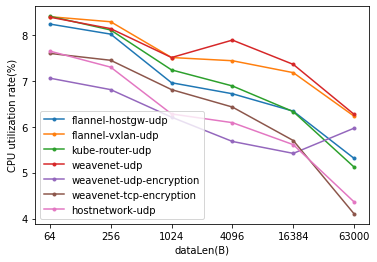

In [3]:
plt.xticks(range(len(data_len)), data_len, rotation=0)
for i, cni in enumerate(plugins):
    cpu = throughput_perf[throughput_perf['cni'] == cni]['cpu']
    plt.plot(x, cpu, label=cni, marker='.')
plt.legend()
plt.xlabel('dataLen(B)')
plt.ylabel('CPU utilization rate(%)')
plt.show()

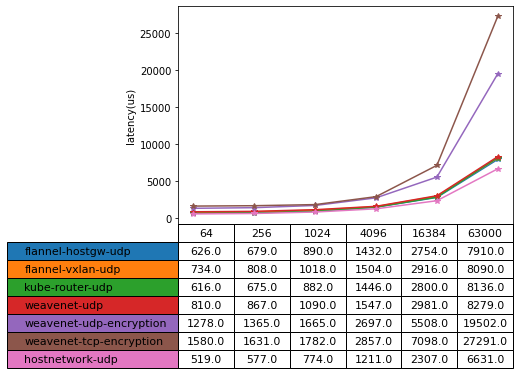

In [4]:
plt.xticks(range(len(data_len)), data_len, rotation=0)
cell_text = []
all_colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
for i, cni in enumerate(plugins):
    lat = latency_perf[latency_perf['cni'] == cni]['latencyave']
    cell_text.append(['%.1f' % x for x in lat])
    plt.plot(x, lat, label=cni, marker='*', color=all_colors[i])

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=plugins,
                      cellLoc='center',
                      rowColours=all_colors[:len(plugins)],
                      colLabels=data_len,
                      loc='bottom')
the_table.set_fontsize(15)
the_table.scale(1, 1.5)

# plt.legend()
# plt.xlabel('dataLen(B)')
plt.ylabel('latency(us)')
plt.xticks([])
plt.show()

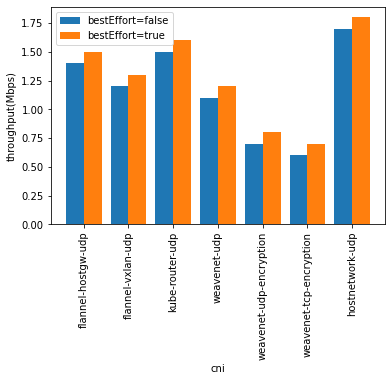

In [5]:
# reliability test
reliable_test = [6,7]
throughput_perf, latency_perf = load_data(reliable_test, plugins, latencyTest=True)
x = np.arange(len(plugins))
total_width, n = 0.8, 2
width = total_width / n
x = x - (total_width - width) / 2

labels = ['bestEffort=false', 'bestEffort=true']
plt.xticks(range(len(plugins)), plugins, rotation=90)
for i, t in enumerate(reliable_test):
    thr = throughput_perf[throughput_perf['test'] == t]['mbps(ave)']
    plt.bar(x + i*width, thr, label=labels[i], width=width)
plt.legend()
plt.xlabel('cni')
plt.ylabel('throughput(Mbps)')
plt.show()

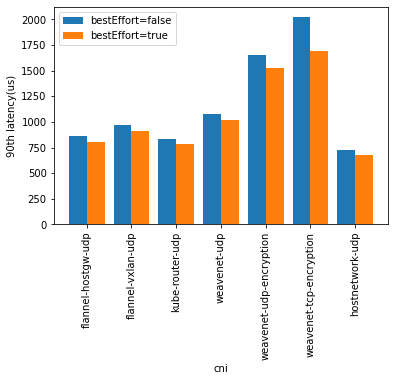

In [6]:
# reliability test
plt.xticks(range(len(plugins)), plugins, rotation=90)
for i, t in enumerate(reliable_test):
    lat = latency_perf[latency_perf['test'] == t]['90%']
    plt.bar(x + i*width, lat, label=labels[i], width=width)
plt.legend()
plt.xlabel('cni')
plt.ylabel('90th latency(us)')
plt.show()

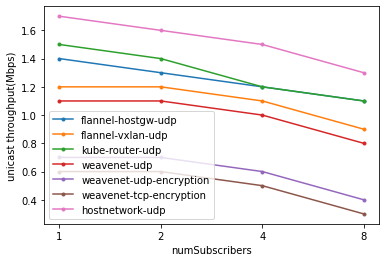

In [7]:
# numSubscriber unicast test
numsub_test = [6, 8, 9, 10]
throughput_perf, latency_perf = load_data(numsub_test, plugins, latencyTest=True)

num_subs = [1,2,4,8]
x = np.arange(4)
total_width, n = 0.8, len(plugins)
width = total_width / n
# x = x - (total_width - width) / 2

plt.xticks(x, num_subs, rotation=0)
for i, cni in enumerate(plugins):
    thr = throughput_perf[throughput_perf['cni'] == cni]['mbps(ave)']
    plt.plot(x, thr, label=cni, marker='.')
plt.legend()
plt.xlabel('numSubscribers')
plt.ylabel('unicast throughput(Mbps)')
plt.show()

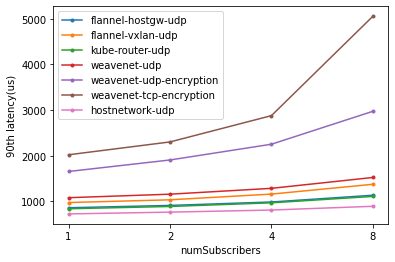

In [8]:
# numSubscriber unicast test
plt.xticks(x, num_subs, rotation=0)
for i, cni in enumerate(plugins):
    lat = latency_perf[latency_perf['cni'] == cni]['90%']
    plt.plot(x, lat, label=cni, marker='.')
plt.legend()
plt.xlabel('numSubscribers')
plt.ylabel('90th latency(us)')
plt.show()

In [9]:
multicast_plugins = ['weavenet-udp', 'hostnetwork-udp', 'weavenet-tcp', 'hostnetwork-tcp']

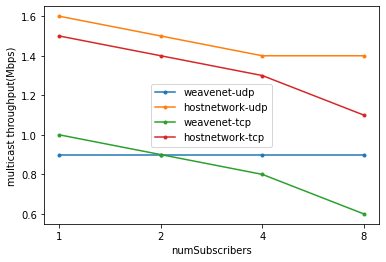

In [10]:
# multicast test
multicast_test = [12,13,14,15]
throughput_perf, latency_perf = load_data(multicast_test,  multicast_plugins, latencyTest=True)

num_subs = [1,2,4,8]
x = np.arange(4)
total_width, n = 0.8, len(plugins)
width = total_width / n
# x = x - (total_width - width) / 2

plt.xticks(x, num_subs, rotation=0)
for i, cni in enumerate(multicast_plugins):
    thr = throughput_perf[throughput_perf['cni'] == cni]['mbps(ave)']
    plt.plot(x, thr, label=cni, marker='.')
plt.legend()
plt.xlabel('numSubscribers')
plt.ylabel('multicast throughput(Mbps)')
plt.show()

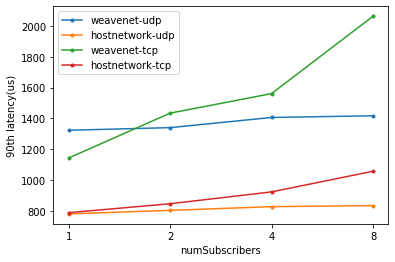

In [11]:
# multicast test
multicast_test = [12,13,14,15]
throughput_perf, latency_perf = load_data(multicast_test,  multicast_plugins, latencyTest=True)

num_subs = [1,2,4,8]
x = np.arange(4)
total_width, n = 0.8, len(plugins)
width = total_width / n
# x = x - (total_width - width) / 2

plt.xticks(x, num_subs, rotation=0)
for i, cni in enumerate(multicast_plugins):
    thr = latency_perf[throughput_perf['cni'] == cni]['90%']
    plt.plot(x, thr, label=cni, marker='.')
plt.legend()
plt.xlabel('numSubscribers')
plt.ylabel('90th latency(us)')
plt.show()